## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|. | | |
|  | |. |

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='link to your selfie'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**


 


# AssignmentWikipediaEditors

In deze opgave halen we een datafile op, die een naar formaat heeft. Het is een spreadsheet, maar het aantal kolommen is niet constant.
 

In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame
import re
from lxml import etree 
from bz2file import BZ2File
import codecs
import nltk
from collections import defaultdict, Counter
from  itertools import combinations  # ideal for creating all possible pairs that out can make out of a set
from __future__ import division
from math import sqrt 

# N1

1. Haal de file <http://language.media.mit.edu/data/public/wikipedia_userlang_iso639-3.zip> op, en unzip hem.
    * Dit mag met de hand, maar natuurlijk liever in code in je notebook.
    * Sla de file `wikipedia_userlang_iso639-3.tsv` in dezelfde folder op als dit notebook
    * use a notebook magic command to show how large this file is.

In [2]:
#Vraag 1 

import urllib
import urllib2
import requests

url = 'http://language.media.mit.edu/data/public/wikipedia_userlang_iso639-3.zip'
urllib.urlretrieve(url, "code.zip")

import zipfile
zip_ref = zipfile.ZipFile('code.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
import os
statinfo = os.stat('wikipedia_userlang_iso639-3.tsv')
statinfo.st_size

134617133L

# N2

2. Bepaal de separator en bepaal hoeveel kolommen een regel maximaal heeft.
    * het maximaal aantal kolommen in een regel mag je ook in de code in de volgende vraag bepalen.

In [2]:
# antwoord N2

import csv

FILENAME = 'wikipedia_userlang_iso639-3.tsv'

# Another way of finding delimiter
with open(FILENAME, 'rb') as csvfile:
    dialect = csv.Sniffer().sniff(csvfile.read(1024))
    print "Delimiter:'%s'" %dialect.delimiter


Delimiter:' '


In [3]:
# Finding longest row
with open(FILENAME,"r") as f:
    reader = csv.reader(f)
    data = list(reader)
    rowcount = len(data)
    
print "%s rows" %rowcount

with open(FILENAME,"r") as f:
    tabcount = [next(f).count("\t") for i in range(rowcount)]
    maxcol = max(tabcount) +1 # Amount of fields is amount of tabs + 1
    
print "Longest row is %s fields long" %maxcol

7335969 rows
Longest row is 241 fields long


# N3 

3. Verander het spreadsheet in een dataframe met een 3 koloms formaat 
    * editor-name
    * taal code
    * hoe vaak (heeft die editor in die taalcode een edit gedaan.
4. Laat met df.head de eerste vijf regels zien. Zoals hieronder.
5. Doe dit alles in een functie en gebruik %time om te tonen hoe lang het duurt

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>gebruikersnaam</th>
      <th>taal</th>
      <th>aantal_edits</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>! ! ! ! ! ! ! ! ! ! ! ! ! ! !</td>
      <td>zho</td>
      <td>7</td>
    </tr>
    <tr>
      <th>1</th>
      <td>! ! ! ! ! ! ! ! ! ! ! ! ! !</td>
      <td>zho</td>
      <td>8</td>
    </tr>
    <tr>
      <th>2</th>
      <td>! ! ! ! ! ! ! ! ! ! ! ! !</td>
      <td>zho</td>
      <td>30</td>
    </tr>
    <tr>
      <th>3</th>
      <td>! ! ! ! ! ! ! ! ! ! ! !</td>
      <td>zho</td>
      <td>7</td>
    </tr>
    <tr>
      <th>4</th>
      <td>! ! ! ! ! ! ! ! ! ! !</td>
      <td>zho</td>
      <td>5</td>
    </tr>
  </tbody>
</table>

#### Hint
* open de file op de behandelde stromende manier en lees hem regel voor regel
* schoon elke regel op en splits die op 
* haal de data die je wilt hebben uit de regel en spaar triples op in een lijst.
* Van die lijst met triples maak je in 1 klap een dataframe
* geef de juiste kolomsnamen als in het voorbeeld 
* borduur voort op de gegeven code

In [2]:
# Vraag 3 

columns = ['gebruikersnaam', 'taal', 'aantal_edits']

def vraag3():
    L=[]
    c=0
    with open('wikipedia_userlang_iso639-3.tsv') as f:
        for line in range(7335969):        
            dirtyline = f.readline()
            cleanedline = dirtyline.replace("\n", "").split('\t')
            username = cleanedline[0]
            useredits = [(i.split(',')[0], i.split(',')[1]) for i in cleanedline[1:]]
            # Add triples to L
            [L.append((username, i[0], i[1])) for i in useredits]
            # Memory
            del dirtyline, cleanedline, username, useredits
            c+=1
            if c% 10**6==0:  # om te debuggen doe ik hier 10**2==0: break 
                print c
        df = pd.DataFrame(L, columns = ('Gebruikersnaam', 'Taal', 'Aantal_edits'))
    return df
                 
%time df  = vraag3()
df.head() 

1000000
2000000
3000000
4000000
5000000
6000000
7000000
Wall time: 20.7 s


Gebruikersnaam Taal Aantal_edits
0  ! ! ! ! ! ! ! ! ! ! ! ! ! ! !  zho            7
1    ! ! ! ! ! ! ! ! ! ! ! ! ! !  zho            8
2      ! ! ! ! ! ! ! ! ! ! ! ! !  zho           30
3        ! ! ! ! ! ! ! ! ! ! ! !  zho            7
4          ! ! ! ! ! ! ! ! ! ! !  zho            5

# N4 

4. Laadt die nieuwe file in pandas in en bepaal:
    1. Hoeveel verschillende editors zijn er?
    1. Voor elk getal i, hoeveel editors hebben er in i talen ge-edit?
        1. Hoeveel hebben er in precies 3 talen geedit?
        2. Plot op de x-as het aantal talen en op de y-as het aantal editors dat in zoveel talen heeft geedit. 
            * Begin beide assen bij 0
            * Gebruik een loglog schaal. Je plot zal er als een bijna rechte neergaande lijn met aan het eind wat wiebels uitzien. 
    1. Wat is het gemiddeld aantal talen waarin iemand edit? Wat is de mediaan?
        * Geef voor zowel het gemiddelde als de mediaan een test waaruit blijkt dat je antwoord klopt.
    
    
#### Geef elk antwoord in een nieuwe cel en geef aan welke subvraag je beantwoordt.

In [3]:
#A 

print "Er zijn %s verschillende editors."% len(df['Gebruikersnaam'].unique())

Er zijn 7314658 verschillende editors.


In [3]:
editors = df['Gebruikersnaam'].value_counts()

answertoframe = editors.to_frame('Ed')

# Memory
del editors

In [17]:
#B

answer = len(answertoframe.query('Ed == 3'))
 
print "Er hebben %s editors in precies 3 talen ge-edit." % (answer)

Er hebben 65988 editors in precies 3 talen ge-edit.


In [20]:
dicty = {}
# Begin at 0
for i in range(0, 241):
    dicty[i] = len(answertoframe.query('Ed == @i'))
dicty

{0: 0,
 1: 6822049,
 2: 354157,
 3: 65988,
 4: 24600,
 5: 12977,
 6: 7814,
 7: 5041,
 8: 3564,
 9: 2630,
 10: 2031,
 11: 1548,
 12: 1328,
 13: 996,
 14: 848,
 15: 697,
 16: 630,
 17: 516,
 18: 509,
 19: 423,
 20: 403,
 21: 351,
 22: 347,
 23: 307,
 24: 274,
 25: 266,
 26: 216,
 27: 227,
 28: 197,
 29: 195,
 30: 168,
 31: 160,
 32: 156,
 33: 128,
 34: 148,
 35: 114,
 36: 134,
 37: 105,
 38: 109,
 39: 93,
 40: 76,
 41: 80,
 42: 106,
 43: 73,
 44: 74,
 45: 57,
 46: 77,
 47: 67,
 48: 66,
 49: 50,
 50: 44,
 51: 55,
 52: 59,
 53: 46,
 54: 44,
 55: 46,
 56: 35,
 57: 51,
 58: 30,
 59: 39,
 60: 22,
 61: 20,
 62: 23,
 63: 33,
 64: 22,
 65: 27,
 66: 15,
 67: 22,
 68: 29,
 69: 22,
 70: 22,
 71: 15,
 72: 16,
 73: 17,
 74: 11,
 75: 28,
 76: 17,
 77: 15,
 78: 16,
 79: 20,
 80: 20,
 81: 11,
 82: 10,
 83: 8,
 84: 8,
 85: 8,
 86: 12,
 87: 7,
 88: 7,
 89: 9,
 90: 12,
 91: 9,
 92: 7,
 93: 6,
 94: 9,
 95: 6,
 96: 7,
 97: 12,
 98: 13,
 99: 9,
 100: 7,
 101: 6,
 102: 6,
 103: 6,
 104: 6,
 105: 6,
 106: 8,
 1

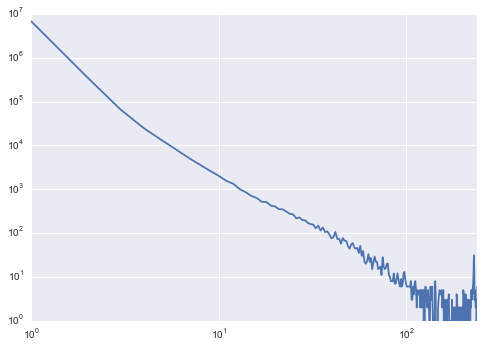

In [21]:
# B plot

import matplotlib.pyplot as plt
import seaborn as sn

df1 = pd.DataFrame.from_dict(dicty, orient='index')

df1.plot(loglog=True, legend=False)

plt.show()

In [22]:
# C mean

answertoframe.mean()

Ed    1.153354
dtype: float64

In [5]:
# C median 

answertoframe.median()

Exception MemoryError: MemoryError('unable to allocate array data.',) in 'pandas.algos.median' ignored


Ed    0
dtype: float64

# N5 

 1. Maak een functie met als input een integer i, dat een dataframe maakt met de kolommen 
> 'taal,taal,aantal editors die in beide talen minstens  i edits hebben gedaan.'

Zorg dat het dataframe omgekeerd gesorteerd is op het aantal editors.
* time je functie voor i=6 en laat de top zien. 
 
### Hints
* denk eens aan een merge
* pas op voor dubbel tellingen: je wilt niet zowel (eng, deu, 14940) als (deu,eng, 14940) in je dataframe hebben zitten
* met `Counter` kan je heel handig tellen.

### Zo moet je output eruit zien:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>taal1</th>
      <th>taal2</th>
      <th>aantal_editors</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>15404</th>
      <td>deu</td>
      <td>eng</td>
      <td>34555</td>
    </tr>
    <tr>
      <th>7093</th>
      <td>eng</td>
      <td>fra</td>
      <td>22852</td>
    </tr>
    <tr>
      <th>13069</th>
      <td>eng</td>
      <td>spa</td>
      <td>19043</td>
    </tr>
    <tr>
      <th>3393</th>
      <td>eng</td>
      <td>rus</td>
      <td>12174</td>
    </tr>
    <tr>
      <th>2348</th>
      <td>eng</td>
      <td>ita</td>
      <td>12060</td>
    </tr>
  </tbody>
</table>